# Object Detection Assessment Project Exercise

## Russian License Plate Blurring




----

### Import Necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Create a function to display images in larger size

In [2]:
def display(img):
    plt.figure(figsize = (10,8))
    plt.imshow(img)

### Read 'car.jpg' with cv2

In [3]:
img = cv2.imread('car.jpg')

### Display the image

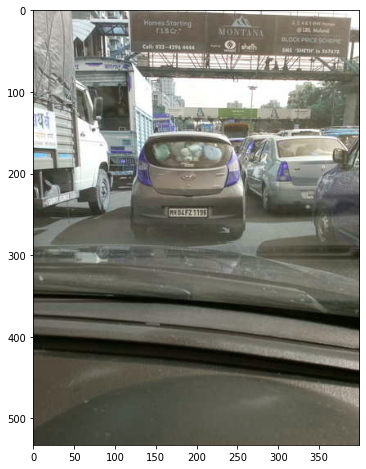

In [4]:
display(img)

### Convert to RGB

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

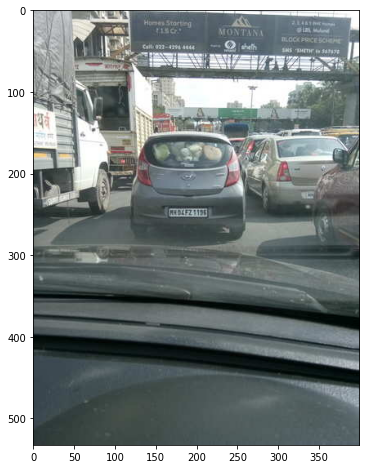

In [6]:
display(img)

### Load the 'haarcascade_russian_plate_number.xml' file.

In [7]:
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [22]:
def detect_plate(img):
    p_img = img.copy()
    p_r = plate_cascade.detectMultiScale(p_img,minNeighbors=4)
    
    for (x,y,w,h) in p_r:
        cv2.rectangle(p_img,(x,y),(x+w,y+h),(0,0,255),4)
    return p_img

In [23]:
detect_plate(img)

array([[[170, 174, 177],
        [175, 179, 182],
        [179, 183, 186],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[179, 183, 186],
        [177, 181, 184],
        [176, 180, 183],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[185, 189, 192],
        [177, 181, 184],
        [171, 175, 178],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 46,  54,  56],
        [ 46,  54,  56],
        [ 47,  55,  57],
        ...,
        [ 86,  99, 107],
        [ 85,  98, 106],
        [ 85,  98, 106]],

       [[ 48,  56,  58],
        [ 48,  56,  58],
        [ 48,  56,  58],
        ...,
        [ 84,  97, 105],
        [ 83,  96, 104],
        [ 83,  96, 104]],

       [[ 49,  57,  59],
        [ 49,  57,  59],
        [ 49,  57,  59],
        ...,
        [ 83,  96, 104],
        [ 83,  96, 104],
        [ 82,  95, 103]]

TASK: Create a function that takes in an image and draws a rectangle around what it detects to be a license plate. Keep in mind we're just drawing a rectangle around it for now, later on we'll adjust this function to blur.

In [64]:
def detect_plate(img):
    
  
    plate_img = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img, minNeighbors = 4) 
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 3) 
        
    return plate_img

In [65]:
result = detect_plate(img)

In [24]:
num = detect_plate(img)


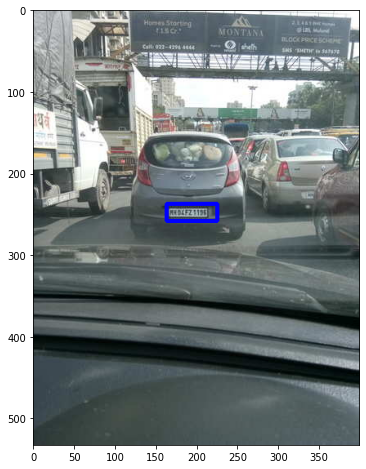

In [25]:
display(num)

### Blur licence plate

**FINAL TASK: Edit the function so that is effectively blurs the detected plate, instead of just drawing a rectangle around it. Here are the steps you might want to take:**

1. The hardest part is converting the (x,y,w,h) information into the dimension values you need to grab an ROI (somethign we covered in the lecture 01-Blending-and-Pasting-Images. It's simply [Numpy Slicing](https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python), you just need to convert the information about the top left corner of the rectangle and width and height, into indexing position values.
2. Once you've grabbed the ROI using the (x,y,w,h) values returned, you'll want to blur that ROI. You can use cv2.medianBlur for this.
3. Now that you have a blurred version of the ROI (the license plate) you will want to paste this blurred image back on to the original image at the same original location. Simply using Numpy indexing and slicing to reassign that area of the original image to the blurred roi.

In [34]:
def detect_blur(img):
    p_img = img.copy()
    roi = img.copy()
    p_r = plate_cascade.detectMultiScale(p_img,minNeighbors=4)
    
    
    
    for (x,y,w,h) in p_r:
        #cv2.rectangle(p_img,(x,y),(x+w,y+h),(0,0,255),4)
        
        x_offset = 0
        y_offset = 0
        
        x_end  = x_offset+w
        y_end = y_offset+h
        
        roi = roi[y_offset:y_end,x_offset:x_end]
        blur_roi = cv2.medianBlur(roi,9)
        p_img[y_offset:y_end,x_offset:x_end] = blur_roi
        
    return p_img

In [35]:
result = detect_blur(img)

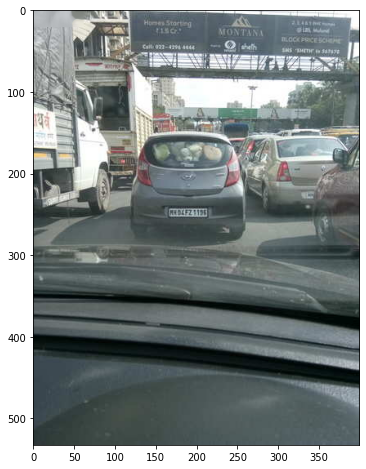

In [36]:
display(result)

***